In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import warnings
import seaborn as sns
from sklearn import metrics
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/sanidhyavishnoi/Study_GL/lab/p2/Bank_Personal_Loan_Modelling-1.csv")
df.shape

(5000, 14)

## Column Descirption

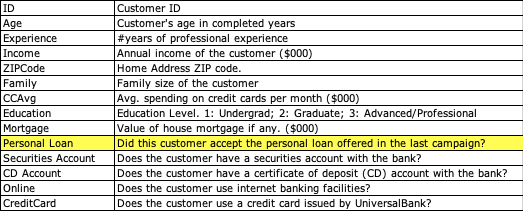

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
df.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2244,2245,57,31,53,92806,1,0.8,2,120,0,0,0,0,0
2015,2016,30,5,141,95747,1,0.8,1,0,0,0,0,1,0
3347,3348,65,41,78,92109,3,2.0,3,0,0,0,1,1,1
433,434,52,28,31,91330,4,0.2,1,141,0,0,0,1,1
2168,2169,55,29,64,93063,4,2.6,3,0,0,0,0,1,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [7]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Exploratry Data Analysis

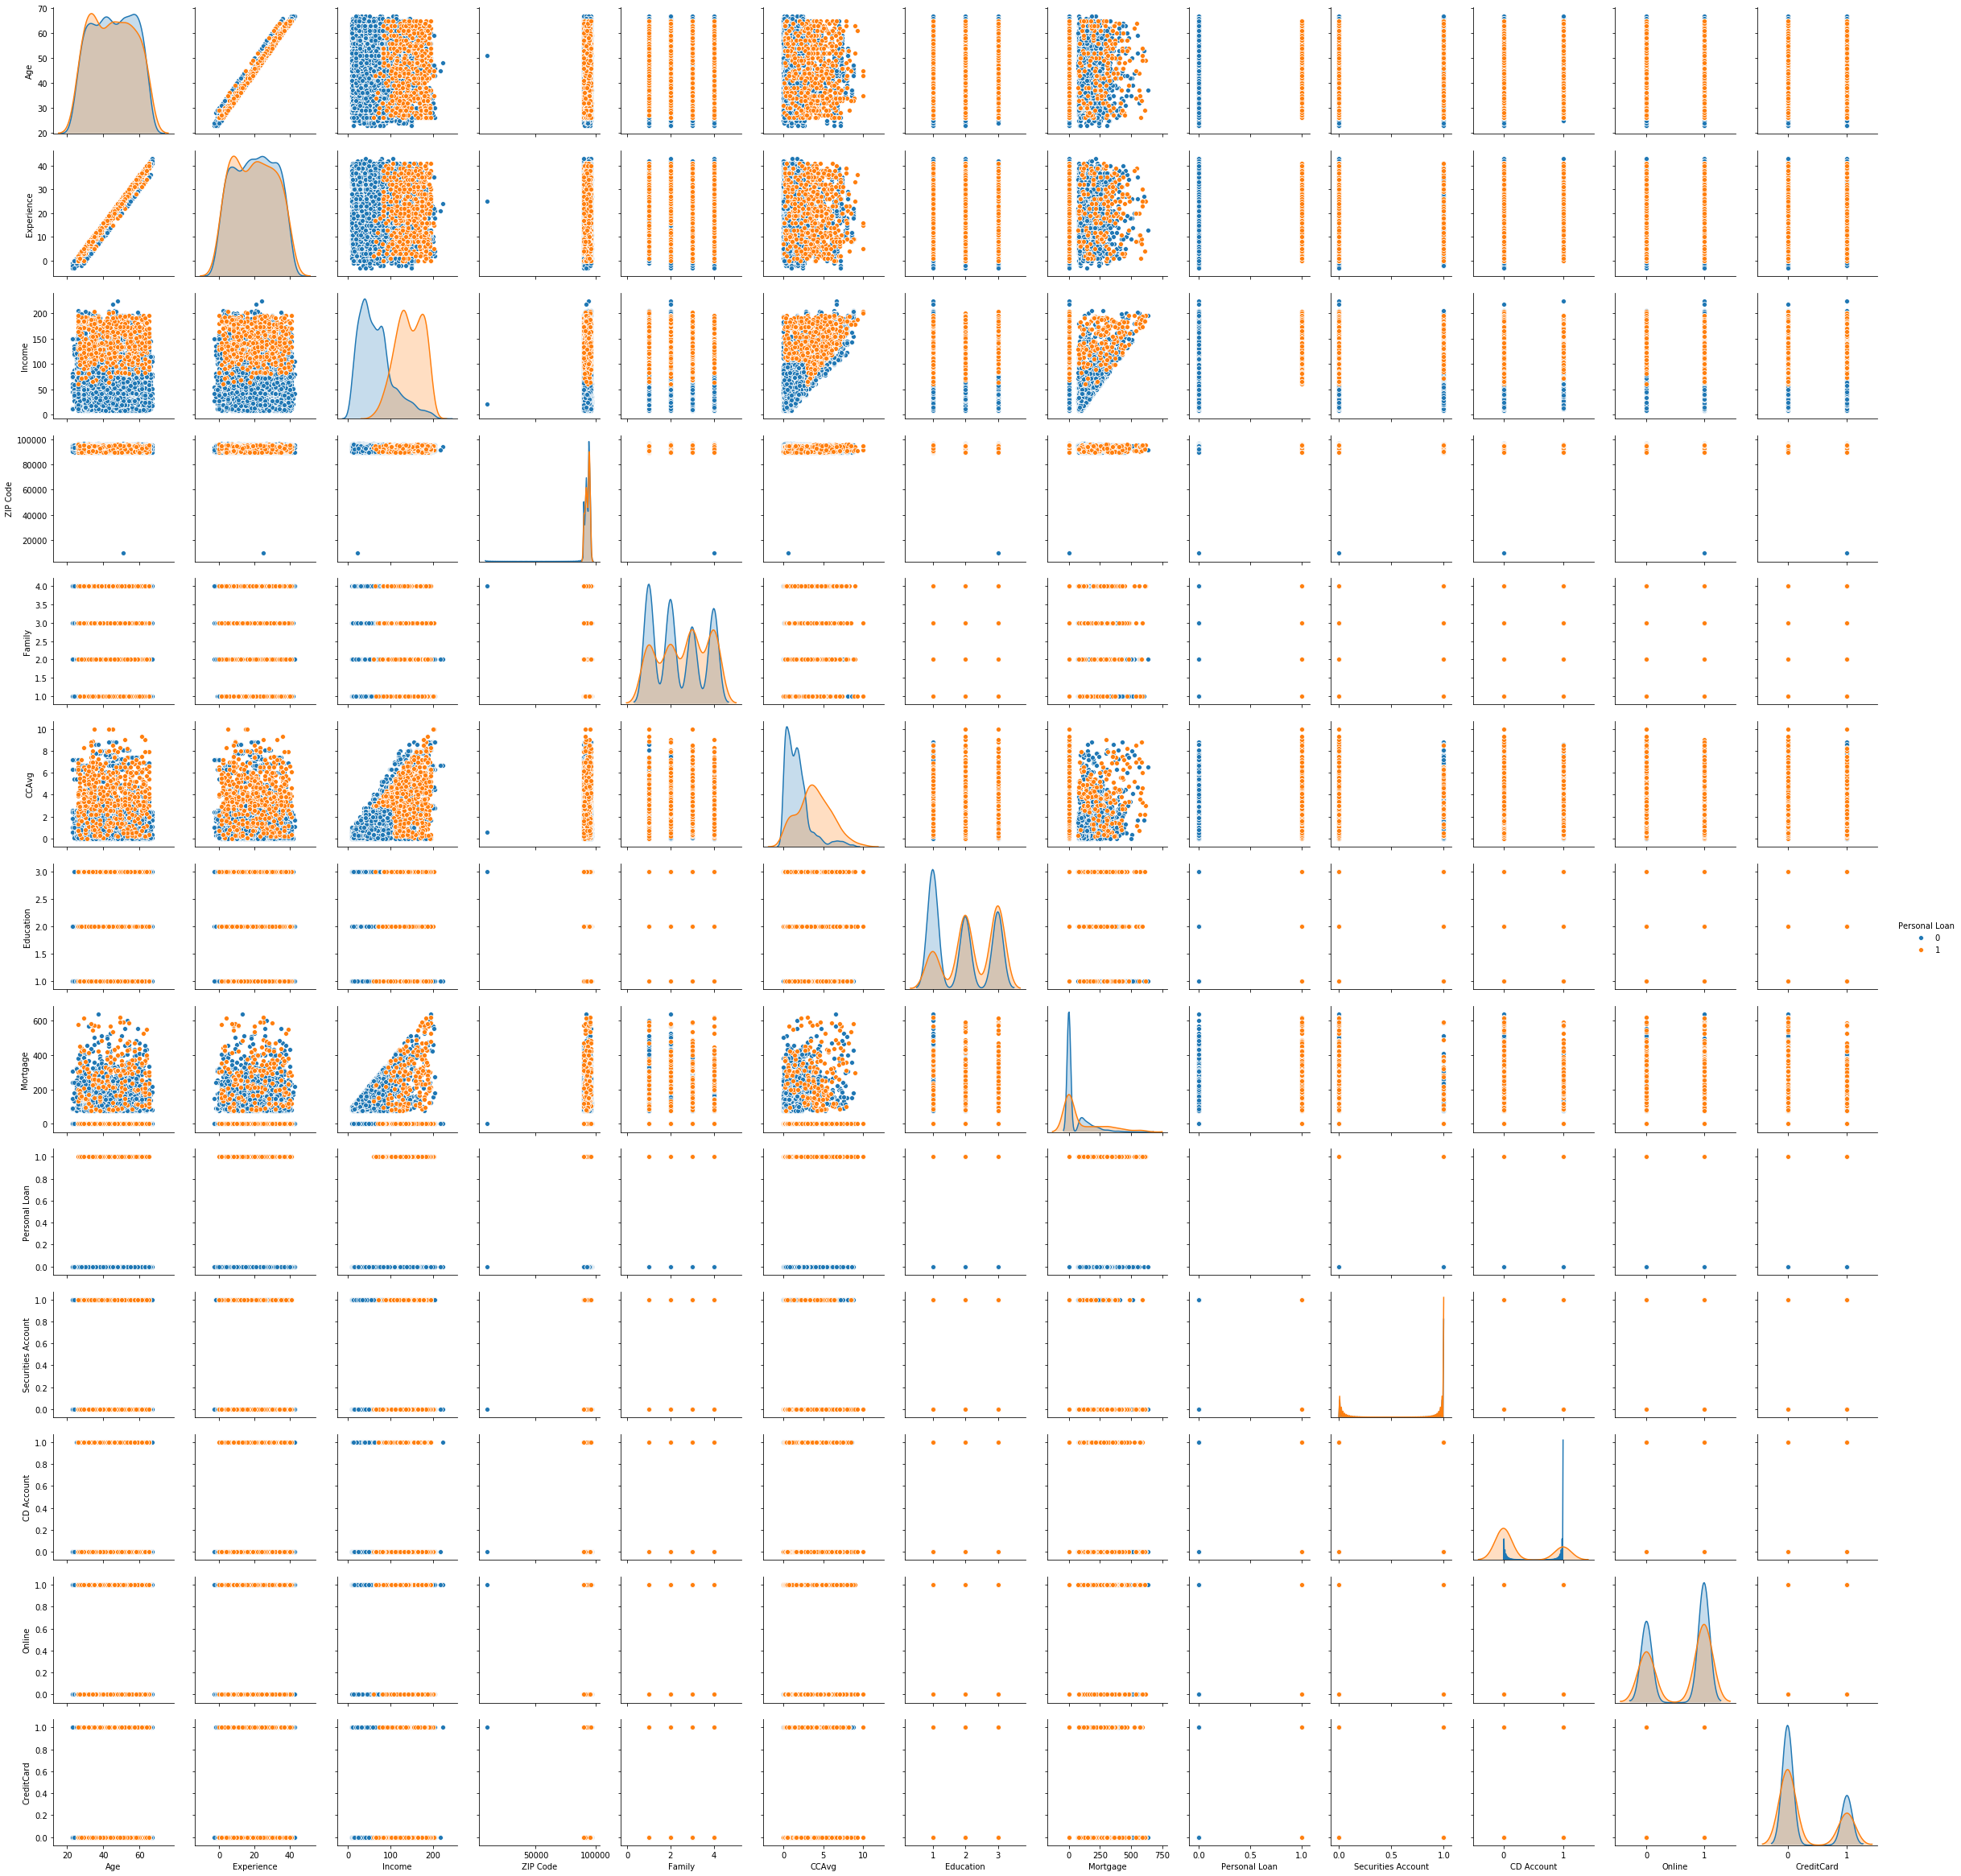

In [8]:
sns.pairplot(df.iloc[:,1:],diag_kind='kde',hue='Personal Loan')

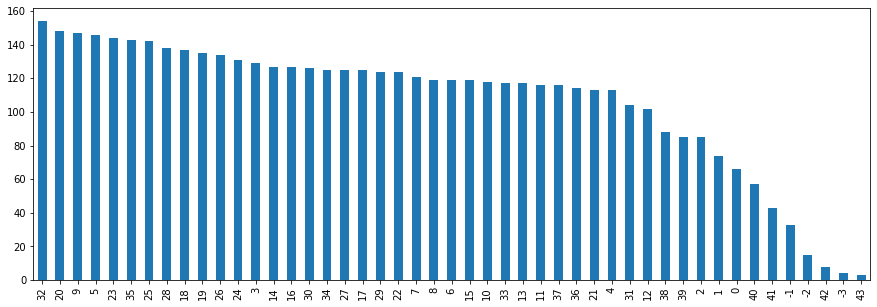

In [9]:
bdf = df['Experience'].value_counts()
bdf.plot(kind = 'bar', figsize =(15,5))

In [10]:
df[df['Experience'] < 0]['Experience'].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

#### As we see there are few values which are not appropriate for this column, like we have (-)'s in here and clearly work experience least can get is 0.
#### As Experience is gained by Age and Education and we have luxury of both columns we will use them to treat our experience column.

In [11]:
df_Pos_Exp = df[df['Experience'] > 0]
df_Neg_Exp =  df[df['Experience'] < 0]
df_Neg_Exp_List = df_Neg_Exp['ID'].tolist()

for id in df_Neg_Exp_List:
    age_val = df.loc[np.where(df['ID']==id)]["Age"].tolist()[0]
    ed_val = df.loc[np.where(df['ID']==id)]["Education"].tolist()[0]
    pos_Exp_Filtered = df_Pos_Exp[(df_Pos_Exp['Age'] == age_val) & (df_Pos_Exp['Education'] == ed_val)]
    if pos_Exp_Filtered.empty :
        neg_Exp_Filtered = df_Neg_Exp[(df_Neg_Exp['Age'] == age_val) & (df_Neg_Exp['Education'] == ed_val)]
        exp = round(neg_Exp_Filtered['Experience'].median())
    else:
        exp = round(pos_Exp_Filtered['Experience'].median())
    df.loc[df.loc[np.where(df['ID']==id)].index, 'Experience'] = abs(exp)


In [12]:
df[df['Experience'] < 0].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

#### Now we can see that there are no negative values in Experience column. 


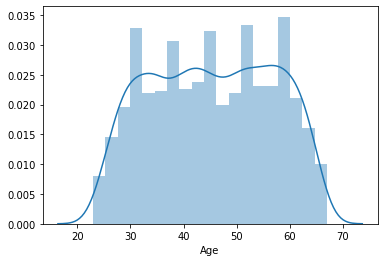

In [13]:
sns.distplot(df['Age'])

#### Age column is normaly distrubuted.


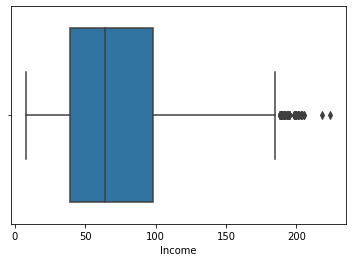

In [14]:
ax = sns.boxplot(x="Income",data=df)

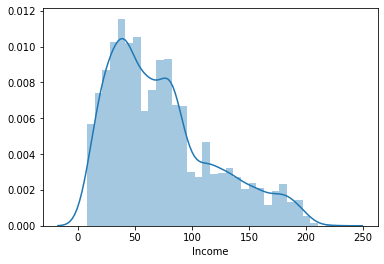

In [15]:
sns.distplot(df['Income'])

#### Income is Right-Skewed and we can say there are few outliers or few columns which have income higher than 200.

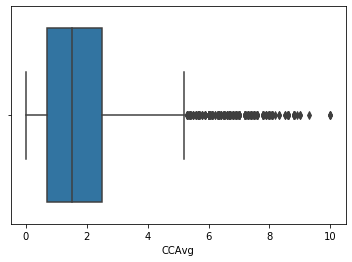

In [16]:
ax = sns.boxplot(x="CCAvg",data=df)

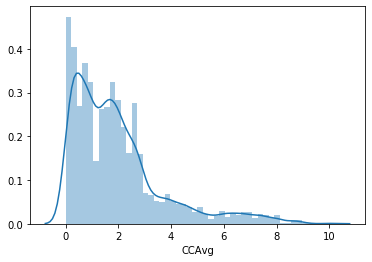

In [17]:
sns.distplot(df['CCAvg'])

#### Credit Card Average Spend is Right-Skewed and we can say that most population spend ranges from 1000 to 2500. Few are spending above 8000 also.  

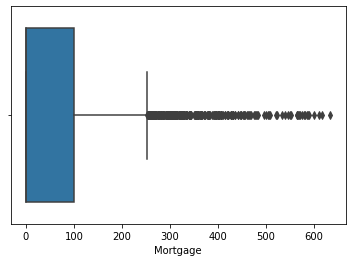

In [18]:
ax = sns.boxplot(x="Mortgage",data=df)

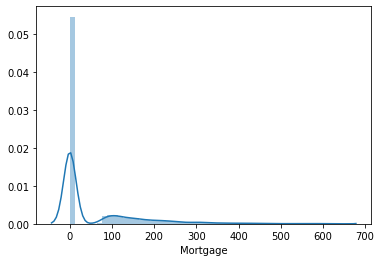

In [19]:
sns.distplot(df['Mortgage'])

#### Mortgage is Right-Skewed and we can say that majority of customers do not have mortgage. Some have mortgage over 600k too.

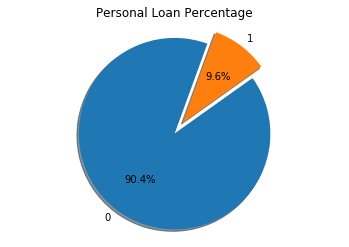

In [20]:
x = pd.DataFrame(df["Personal Loan"].value_counts()).reset_index()
x.columns =["State","Personal Loan"]
x

fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(x["Personal Loan"], explode=explode, labels=x["State"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

#### We can see that the data is having a huge bias(almost 1:10) towards the category of people not accepting the personal loan. 
#### We can infer that our model will tend to perform better towards predicting which customers will not accept the personal loan. 

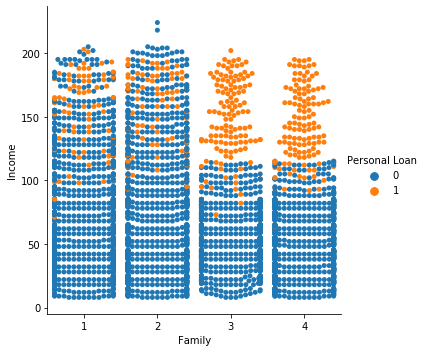

In [21]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = df, kind='swarm')

#### We can clearly see here that population having family size >= 3 and less income, are more likely to opt for a personal loan 

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


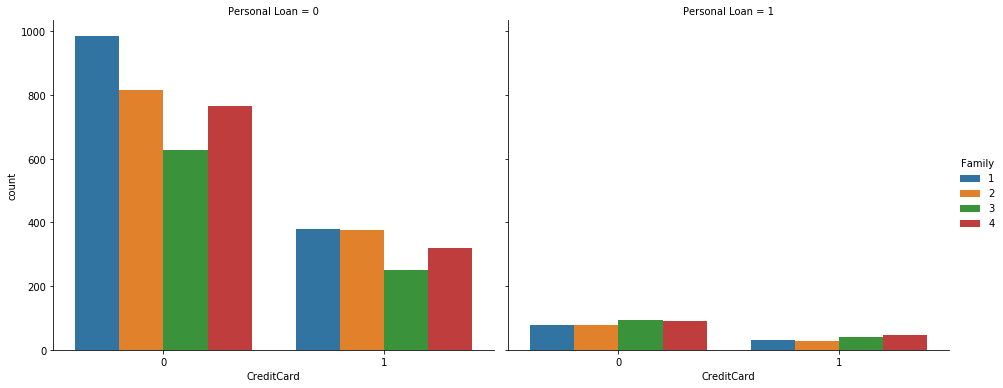

In [22]:
sns.catplot(x="CreditCard", hue="Family", col="Personal Loan",data=df, kind="count",height=5.5, aspect=1.2)
pd.crosstab(df["CreditCard"],df["Personal Loan"])

In [23]:
print('Credit card spending of Non-Loan customers: ',df[df['Personal Loan'] == 0]['CCAvg'].mean()*1000)
print('Credit card spending of Loan customers    : ', df[df['Personal Loan'] == 1]['CCAvg'].mean()*1000)

Credit card spending of Non-Loan customers:  1729.0088495575294
Credit card spending of Loan customers    :  3905.354166666666


#### There are many customers which dont have credit card or personal loan. Customers not having credit card are more than customers having credit card who opted for personal loan.
#### Customers with Average credit card spending of 1700 are more likely to not opt for a personal loan then customers who spend average 3900 on Credit Card.

Personal Loan,0,1
CD Account,,
0,4358,340
1,162,140


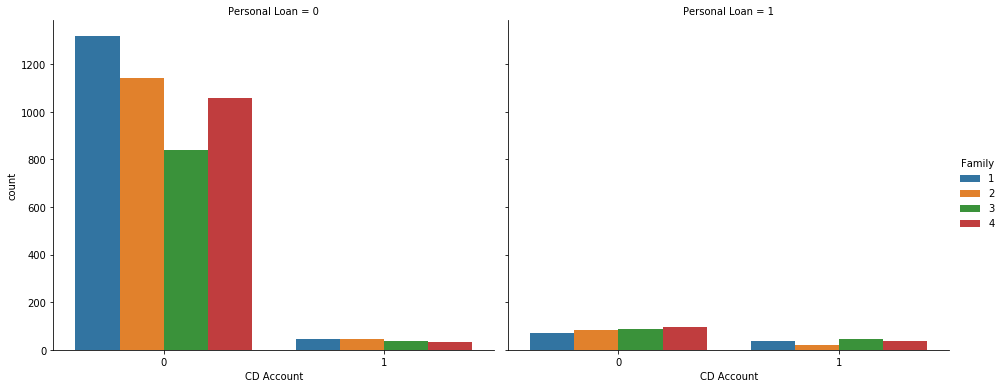

In [24]:
sns.catplot(x="CD Account", hue="Family", col="Personal Loan", data=df, kind="count", height=5.5, aspect=1.2)
pd.crosstab(df["CD Account"],df["Personal Loan"])

#### About 87% of population don't have CD account as well as Personal Loan. Most of the customers who have CD account likely to have a personal loan too. 

Personal Loan,0,1
Education,,
1,2003,93
2,1221,182
3,1296,205


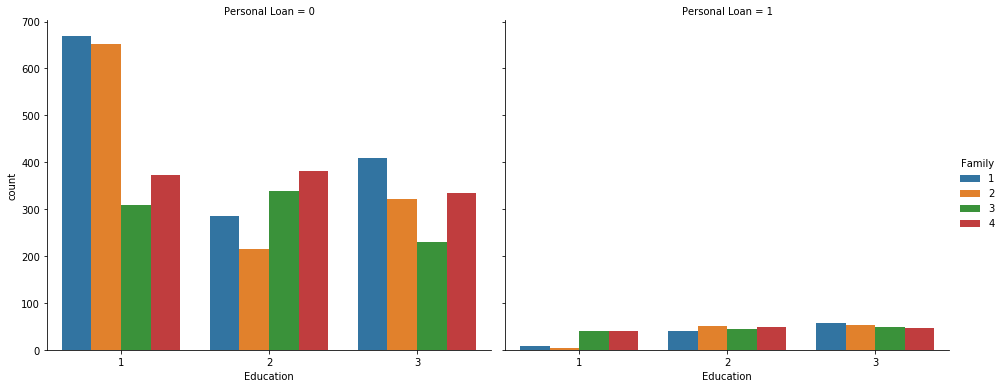

In [25]:
sns.catplot(x="Education", hue="Family", col="Personal Loan", data=df, kind="count", height=5.5, aspect=1.2)
pd.crosstab(df["Education"],df["Personal Loan"])

#### We can see that people having family >=3 are more likely to opt for personal loan regardless of education.  

Text(0.5, 1.0, 'Income Distribution')

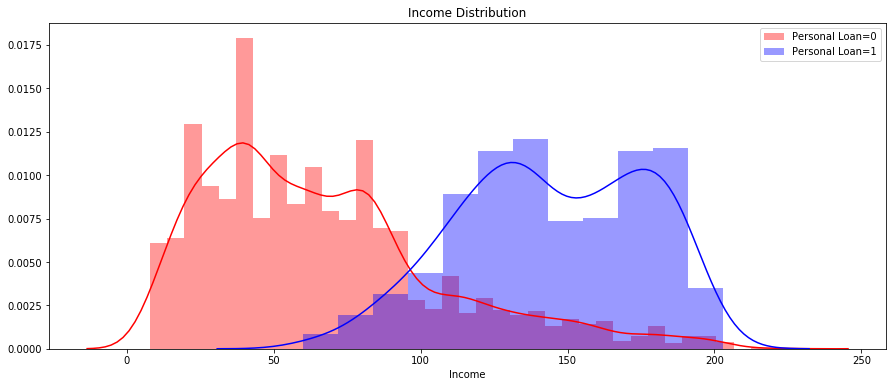

In [26]:
plt.figure(figsize=(15,6))
sns.distplot(df[df["Personal Loan"] == 0]['Income'], color = 'r',label='Personal Loan=0')
sns.distplot(df[df["Personal Loan"] == 1]['Income'], color = 'b',label='Personal Loan=1')
plt.legend()
plt.title("Income Distribution")

#### Customers who have taken personal loan have high income than those who did not take. So income seems to be a good feature for our model prediction.

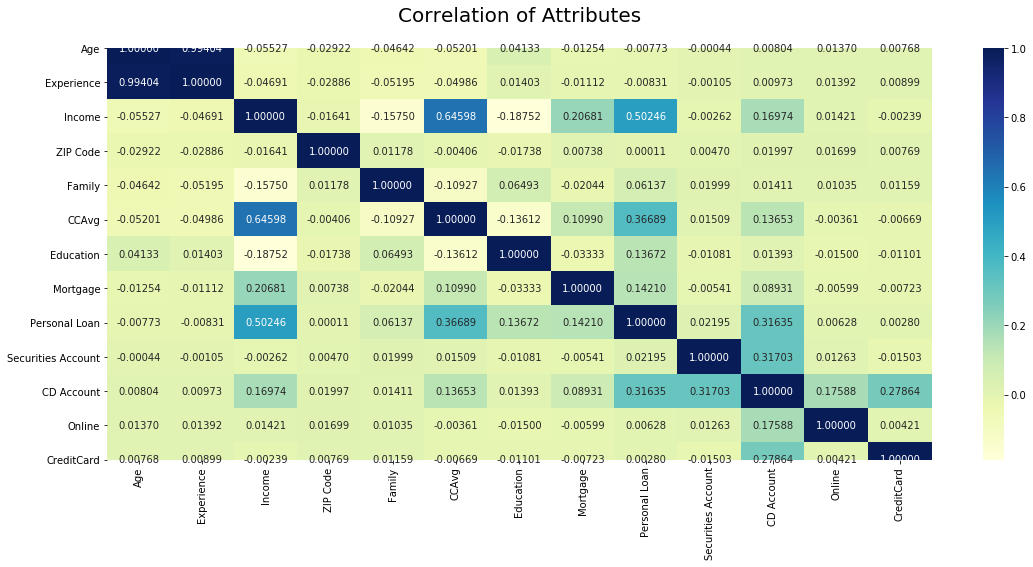

In [27]:
fig,ax = plt.subplots(figsize = (16,8))
plt.title('Correlation of Attributes', y=1.05, size=20)
sns.heatmap(df.iloc[:,1:].corr(), cmap='YlGnBu',annot=True, fmt='.5f',ax = ax)
plt.tight_layout()

- Age and Experience are highly correlated.
- Personal Loan has maximum correlation with 'Income', 'CCAvg', 'CD Account', 'Mortgage', and 'Education'.
- Income influences 'CCAvg', 'Personal Loan', 'CD Account' and 'Mortgage'.
- We can see that there is association of 'CD Account' with categorical columns but not good association with numerical ones.


# Models :

#### We can drop ID column, as it is just an index.
#### We can drop ZIPCODE as it is not healthy corelated with any other feature in our model and our model will take that into account as a large integer but actually it is not, it is just a code for specific city. Also it has 467 unique values.We can add that again after our modelling so as to get regional insights.
#### We can drop Experience too as it is highly co-related with Age. 
#### We will treat Mortgage as it is important feature and their are many outliers present in that column and we know it is right skewed. Skewness can be dealt with Z- Score.



In [28]:
from scipy.stats import zscore
df = df.drop(['ID','ZIP Code','Experience'],axis =1)
df['Mortgage_score'] = np.abs(zscore(df['Mortgage']))
df= df[df['Mortgage_score']<3]
df.drop('Mortgage_score',axis =1, inplace = True)
df.shape

(4895, 11)

In [29]:
X = df.drop('Personal Loan',axis =1 )
y = df['Personal Loan']
print('Shape of Independent Variable Set :\n\n',X.shape , '\n\nIndependent Variables:\n\n', X.columns)
print('\nShape of Target Variable Set :\n\n',y.shape, '\n\nTarget Variable:\n\n', y.name )
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.30 , random_state = 29)

Shape of Independent Variable Set :

 (4895, 10) 

Independent Variables:

 Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

Shape of Target Variable Set :

 (4895,) 

Target Variable:

 Personal Loan


In [30]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrp = lr.predict(X_test)
cm_lr = metrics.confusion_matrix(y_test, lrp)

#KNN 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
knnp = knn.predict(X_test)
cm_knn = metrics.confusion_matrix(y_test, knnp)

#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnbp = gnb.predict(X_test)
cm_gnb = metrics.confusion_matrix(y_test, gnbp)


         *****************************************-Model-Summary-*********************************************


Logistic Regression Model Confusion matrix: 

 [[1323   12]
 [  43   91]]

     True Positive     =  91
     True Negative     =  1323
     False Positve     =  12
     False Negative    =  43

K-Nearest Neighbors Model Confusion matrix: 

 [[1330    5]
 [  39   95]]

     True Positive     =  95
     True Negative     =  1330
     False Positive    =  5
     False Negative    =  39

Naïve Bayes Model Confusion matrix: 

 [[1228  107]
 [  55   79]]

     True Positive     =  79
     True Negative     =  1228
     False Positive    =  107
     False Negative    =  55


                       Accuracy      Error     Recall  Precision   F1_Score
Logistic Regression  96.255956   3.744044  67.910448  88.349515  76.793249
K-Nearest Neighbors  97.004765   2.995235  70.895522  95.000000  81.196581
Naïve Bayes          88.972090  11.027910  58.955224  42.473118  49.375000


        

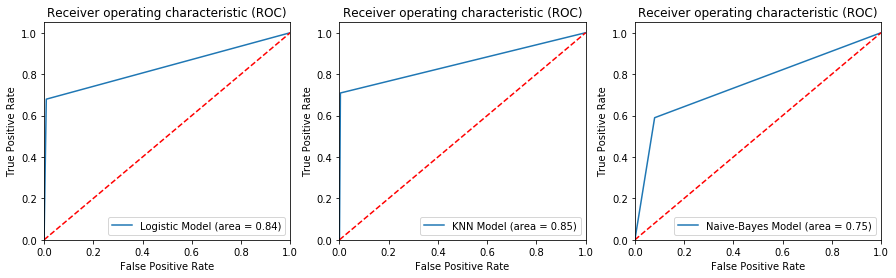

In [36]:
def model_score(cm,model_str,pos_class=1) :
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    acc = (TN + TP) / (TN+FN+TP+FP)
    error = (FN + FP) / (TN+FN+TP+FP)
    recall = TP / (TP+FN)
    Precision =  TP / (TP+FP)
    f1 = 2*recall*Precision/(recall+Precision)
    cols = ['acc','error','recall','Precision','f1']
    
    df_score = pd.DataFrame({'Accuracy':acc*100,
                             'Error':error*100,
                             'Recall':recall*100,
                             'Precision':Precision*100,
                             'F1_Score':f1*100},index =[model_str])
    
    
    return df_score

results = pd.DataFrame()

i=0
for cm in [cm_lr,cm_knn,cm_gnb]:
    if i == 0:
        model_name = 'Logistic Regression'
    elif i==1:
        model_name = 'K-Nearest Neighbors'
    elif i==2:
         model_name = 'Naïve Bayes'
    temp_res = model_score(cm = cm,model_str = model_name)
    i+=1

    results = pd.concat([results,temp_res],0)
    
print('\n         *****************************************-Model-Summary-*********************************************\n')
print('\nLogistic Regression Model Confusion matrix: \n\n', cm_lr)
print('\n     True Positive     = ', cm_lr[1][1])
print('     True Negative     = ',   cm_lr[0][0])
print('     False Positve     = ',   cm_lr[0][1])
print('     False Negative    = ',   cm_lr[1][0])
print('\nK-Nearest Neighbors Model Confusion matrix: \n\n', cm_knn)
print('\n     True Positive     = ', cm_knn[1][1])
print('     True Negative     = ',   cm_knn[0][0])
print('     False Positive    = ',   cm_knn[0][1])
print('     False Negative    = ',   cm_knn[1][0])
print('\nNaïve Bayes Model Confusion matrix: \n\n', cm_gnb)
print('\n     True Positive     = ', cm_gnb[1][1])
print('     True Negative     = ',   cm_gnb[0][0])
print('     False Positive    = ',   cm_gnb[0][1])
print('     False Negative    = ',   cm_gnb[1][0])
print('\n\n',results)
print('\n\n         \t****************************-ROC-Curve-*****************************\n')

logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_test, lrp)
logistic_roc_auc = metrics.roc_auc_score(y_test, lrp)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, knnp)
knn_roc_auc = metrics.roc_auc_score(y_test, knnp)
fig1_graph.add_subplot(1,3,2)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, gnbp)
nb_roc_auc = metrics.roc_auc_score(y_test, gnbp)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



### We can tune further by scaling the attributes.

In [32]:
#Scaling
col = df.columns
sc = preprocessing.StandardScaler()
sc_X_train = sc.fit_transform(X_train)
sc_X_test = sc.fit_transform(X_test)

In [33]:
#Logistic Regression
lr = LogisticRegression()
lr.fit(sc_X_train,y_train)
lrp = lr.predict(sc_X_test)
cm_lr = metrics.confusion_matrix(y_test, lrp)

#KNN 
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(sc_X_train,y_train)
knnp = knn.predict(sc_X_test)
cm_knn = metrics.confusion_matrix(y_test, knnp)

#Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(sc_X_train,y_train)
gnbp = gnb.predict(sc_X_test)
cm_gnb = metrics.confusion_matrix(y_test, gnbp)


         *****************************************-Model-Summary-*********************************************


Logistic Regression Model Confusion matrix: 

 [[1323   12]
 [  43   91]]

     True Positive     =  91
     True Negative     =  1323
     False Positve     =  12
     False Negative    =  43

K-Nearest Neighbors Model Confusion matrix: 

 [[1330    5]
 [  39   95]]

     True Positive     =  95
     True Negative     =  1330
     False Positive    =  5
     False Negative    =  39

Naïve Bayes Model Confusion matrix: 

 [[1228  107]
 [  55   79]]

     True Positive     =  79
     True Negative     =  1228
     False Positive    =  107
     False Negative    =  55


                       Accuracy      Error     Recall  Precision   F1_Score
Logistic Regression  96.255956   3.744044  67.910448  88.349515  76.793249
K-Nearest Neighbors  97.004765   2.995235  70.895522  95.000000  81.196581
Naïve Bayes          88.972090  11.027910  58.955224  42.473118  49.375000


        

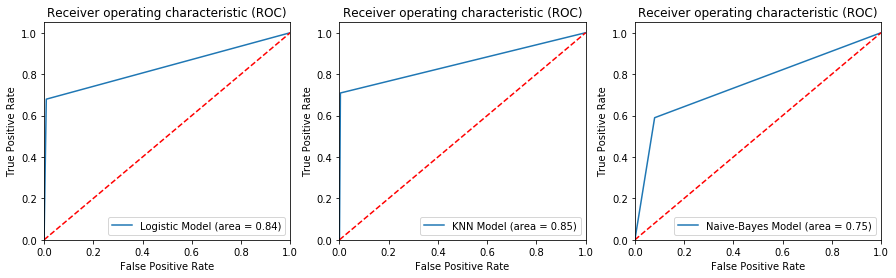

In [34]:
def model_score(cm,model_str,pos_class=1) :
    TN = cm[0][0]
    FN = cm[1][0]
    TP = cm[1][1]
    FP = cm[0][1]
    acc = (TN + TP) / (TN+FN+TP+FP)
    error = (FN + FP) / (TN+FN+TP+FP)
    recall = TP / (TP+FN)
    Precision =  TP / (TP+FP)
    f1 = 2*recall*Precision/(recall+Precision)
    cols = ['acc','error','recall','Precision','f1']
    
    df_score = pd.DataFrame({'Accuracy':acc*100,
                             'Error':error*100,
                             'Recall':recall*100,
                             'Precision':Precision*100,
                             'F1_Score':f1*100},index =[model_str])
    
    
    return df_score

results = pd.DataFrame()

i=0
for cm in [cm_lr,cm_knn,cm_gnb]:
    if i == 0:
        model_name = 'Logistic Regression'
    elif i==1:
        model_name = 'K-Nearest Neighbors'
    elif i==2:
         model_name = 'Naïve Bayes'
    temp_res = model_score(cm = cm,model_str = model_name)
    i+=1

    results = pd.concat([results,temp_res],0)
    
print('\n         *****************************************-Model-Summary-*********************************************\n')
print('\nLogistic Regression Model Confusion matrix: \n\n', cm_lr)
print('\n     True Positive     = ', cm_lr[1][1])
print('     True Negative     = ',   cm_lr[0][0])
print('     False Positve     = ',   cm_lr[0][1])
print('     False Negative    = ',   cm_lr[1][0])
print('\nK-Nearest Neighbors Model Confusion matrix: \n\n', cm_knn)
print('\n     True Positive     = ', cm_knn[1][1])
print('     True Negative     = ',   cm_knn[0][0])
print('     False Positive    = ',   cm_knn[0][1])
print('     False Negative    = ',   cm_knn[1][0])
print('\nNaïve Bayes Model Confusion matrix: \n\n', cm_gnb)
print('\n     True Positive     = ', cm_gnb[1][1])
print('     True Negative     = ',   cm_gnb[0][0])
print('     False Positive    = ',   cm_gnb[0][1])
print('     False Negative    = ',   cm_gnb[1][0])
print('\n\n',results)
print('\n\n         \t****************************-ROC-Curve-*****************************\n')

logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_test, lrp)
logistic_roc_auc = metrics.roc_auc_score(y_test, lrp)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, knnp)
knn_roc_auc = metrics.roc_auc_score(y_test, knnp)
fig1_graph.add_subplot(1,3,2)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, gnbp)
nb_roc_auc = metrics.roc_auc_score(y_test, gnbp)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



## Conclusion :


- From the above, we can clearly see that K-NN Alogorithm with scaled attributes gives us best accuracy of 97.00% and best F1 Score of 81.19.
- Also the Type I(False Positive) and Type II(False Negative) errors are least in K-NN model with scaled attributes.
- The area in ROC curve for Logistic Regression and K-NN is quite similar, but K-NN in comparison over Logistic is good, which states that K-NN is the best model for the given case.
- Summing up, among the above three algorithm applied on the underline dataset, scaled attributes are giving better results over unscaled attributes also K-NN would be the best choice to predict the customers who will accept the personal loan.

                                                 ***THE-END***